# พลอตข้อมูลฝนสถานีสสน.ประเทศไทยด้วย geopandas
### ต้องมีความรู้พื้นฐาน pandas ก่อน สามารถเรียนด้วยตนเองได้จากลิงก์ตัวอย่างต่อไปนี้ 
* บล็อกภาษาไทย https://blog.datath.com/cheatsheet-pandas/
* ยูทูป อ.ประเสริฐ https://www.youtube.com/playlist?list=PLoTScYm9O0GGsOHPCeufxCLt-uGU5Rsuj
* เวปทางการของ pandas มีติวเตอร์เรียลให้เยอะมาก https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

### ต้องเรียน geopandas
* ยูทูป อ.ประเสริฐ https://www.youtube.com/playlist?list=PLoTScYm9O0GG6YQp8rpYK4DVkalW_eo_p
* เวปบล๊อกตัวอย่างภาษาไทย https://medium.com/super-ai-engineer/%E0%B8%A7%E0%B8%B4%E0%B9%80%E0%B8%84%E0%B8%A3%E0%B8%B2%E0%B8%B0%E0%B8%AB%E0%B9%8C%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5-spatial-data-%E0%B9%82%E0%B8%94%E0%B8%A2%E0%B9%83%E0%B8%8A%E0%B9%89-geopandas-part1-90be80866ea2
* ยูทูป อ.ยาง https://www.youtube.com/watch?v=Qju1z6a2Is4&list=PL2e-NEAjUyLGJz7c3Wa9rKajoArtgXO2I&index=12&t=14s
* เวปไซต์ทางการของ geopandas https://geopandas.org/en/v0.9.0/getting_started/introduction.html

In [1]:
'''
2024/01/09 
พัฒนาโค้ดโดย รศ.ดร.นัฐพล มหาวิค 
email:nattaponm@nu.ac.th 
ยูทูป:https://www.youtube.com/@Nattapon_Mahavik/playlists 
หนังสือ: เรดาร์ตรวจอากาศทางอุตุนิยมวิทยา https://www.chulabook.com/education/144567
Github: https://github.com/nattaponm
Scopus: https://www.scopus.com/authid/detail.uri?authorId=55583236600
'''

'\n2024/01/09 \nพัฒนาโค้ดโดย รศ.ดร.นัฐพล มหาวิค \nemail:nattaponm@nu.ac.th \nยูทูป:https://www.youtube.com/@Nattapon_Mahavik/playlists \nหนังสือ: เรดาร์ตรวจอากาศทางอุตุนิยมวิทยา https://www.chulabook.com/education/144567\nGithub: https://github.com/nattaponm\nScopus: https://www.scopus.com/authid/detail.uri?authorId=55583236600\n'

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

from matplotlib_scalebar.scalebar import ScaleBar

## อ่านตำแหน่งสถานีวัดน้ำฝนภาคพื้นดิน สสน. 

In [3]:
df = pd.read_csv('../1data/station_metadata_haii_geographic.csv')
df.head()

,code,name,lat,long,tambon,amphoe,province,basin,region,station_type
0,KSKP,อบต.กำแพงแสน,14.003264,99.980928,กำแพงแสน,กำแพงแสน,นครปฐม,แม่น้ำท่าจีน,ภาคกลาง,R
1,TTWY,ทม.วังน้ำเย็น,13.501094,102.180230,วังน้ำเย็น,วังน้ำเย็น,สระแก้ว,แม่น้ำปราจีนบุรี,ภาคกลาง,R
2,KOSB,รพสต.ท่าข้าม,13.627654,102.574842,ท่าข้าม,อรัญประเทศ,สระแก้ว,โตนเลสาป,ภาคกลาง,R
3,BDCP,อบต.ด่านชุมพล,12.444714,102.630067,ด่านชุมพล,บ่อไร่,ตราด,ชายฝั่งทะเลตะวันออก,ภาคกลาง,R
4,MEWG,อบต.บ้านกาด,18.603893,98.798470,บ้านกาด,แม่วาง,เชียงใหม่,แม่น้ำปิง,ภาคเหนือ,R


## แปลงตำแหน่งสถานีวัดน้ำให้เป็น geopandas dataframe

In [4]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geo_df_st = gpd.GeoDataFrame(df, 
                          crs = crs, 
                          geometry = geometry)

C:\Users\Admin\anaconda3\envs\ml_dl_n1\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [5]:
geo_df_st.head()

,code,name,lat,long,tambon,amphoe,province,basin,region,station_type,geometry
0,KSKP,อบต.กำแพงแสน,14.003264,99.980928,กำแพงแสน,กำแพงแสน,นครปฐม,แม่น้ำท่าจีน,ภาคกลาง,R,POINT (99.98093 14.00326)
1,TTWY,ทม.วังน้ำเย็น,13.501094,102.180230,วังน้ำเย็น,วังน้ำเย็น,สระแก้ว,แม่น้ำปราจีนบุรี,ภาคกลาง,R,POINT (102.18023 13.50109)
2,KOSB,รพสต.ท่าข้าม,13.627654,102.574842,ท่าข้าม,อรัญประเทศ,สระแก้ว,โตนเลสาป,ภาคกลาง,R,POINT (102.57484 13.62765)
3,BDCP,อบต.ด่านชุมพล,12.444714,102.630067,ด่านชุมพล,บ่อไร่,ตราด,ชายฝั่งทะเลตะวันออก,ภาคกลาง,R,POINT (102.63007 12.44471)
4,MEWG,อบต.บ้านกาด,18.603893,98.798470,บ้านกาด,แม่วาง,เชียงใหม่,แม่น้ำปิง,ภาคเหนือ,R,POINT (98.79847 18.60389)


## อ่านขอบเขตลุ่มน้ำ แสดงแผนที่

In [6]:
basin_map = gpd.read_file('../1data/1shape_gis/1basin_th/MainBasin_ONWR_Law_WGS84.shp', encoding="TIS-620")
basin_map.head()

,MB_CODE,MBASIN_T,MBASIN_E,AREA_SQKM,geometry
0,01,สาละวิน,Salawin,19101.550019,"MULTIPOLYGON (((427015.307 2117880.732, 427015..."
1,02,โขงเหนือ,North Khong,17432.583752,"POLYGON ((492274.691 2185816.923, 492298.497 2..."
2,03,โขงตะวันออกเฉียงเหนือ,Northeast Khong,47165.078898,"MULTIPOLYGON (((1202723.451 1695889.957, 12026..."
3,04,ชี,Chi,49269.589431,"POLYGON ((1066959.970 1808982.947, 1066925.717..."
4,05,มูล,Mun,70947.717673,"POLYGON ((1199462.673 1703888.438, 1199449.364..."


<AxesSubplot: >

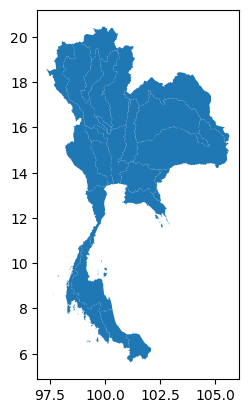

In [7]:
basin_map.to_crs(epsg=4326).plot()

## แสดงแผนที่ลุ่มน้ำ กับ ตำแหน่งสถานีวัดน้ำฝน

Text(0.5, 1.0, 'HAII rain stations in Thailand')

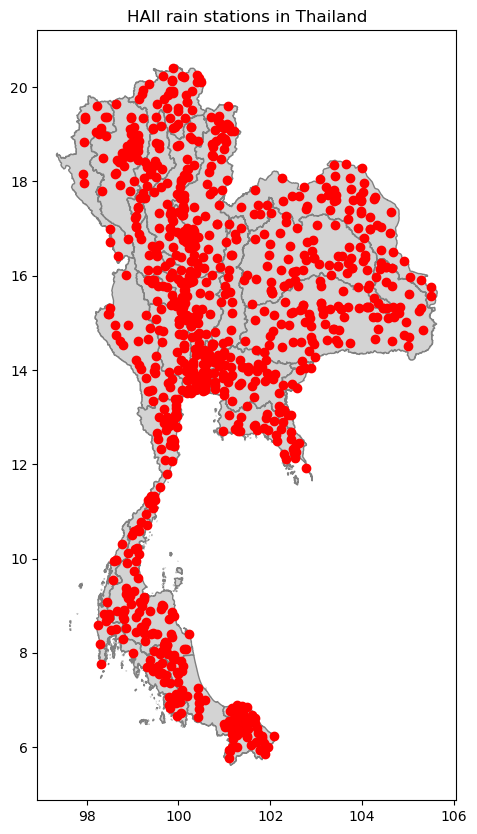

In [8]:
fig, ax = plt.subplots(figsize = (10,10))
basin_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey', edgecolor='grey', linewidth=1)
geo_df_st.plot(ax=ax, color='red')
ax.set_title('HAII rain stations in Thailand')

## แสดงแผนที่ลุ่มน้ำ กับ ตำแหน่งสถานีวัดน้ำฝน ตามความหนาแน่น

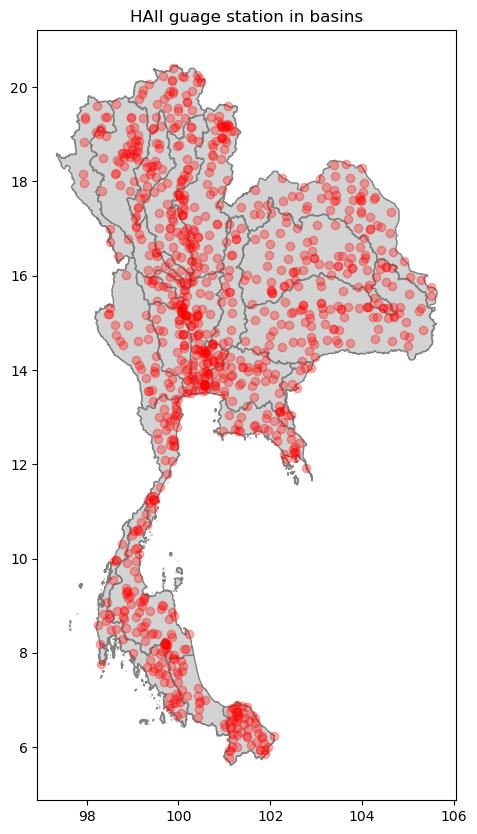

In [9]:
fig, ax = plt.subplots(figsize = (10,10))
basin_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey', edgecolor='grey', linewidth=1)
geo_df_st.plot(ax=ax,  color='red', alpha = .3 )
ax.set_title('HAII guage station in basins')
plt.savefig('../2results/map_gauge_haii_basins.jpg')

## แผนที่แบบมี scale bar 
https://geopandas.org/en/stable/gallery/matplotlib_scalebar.html

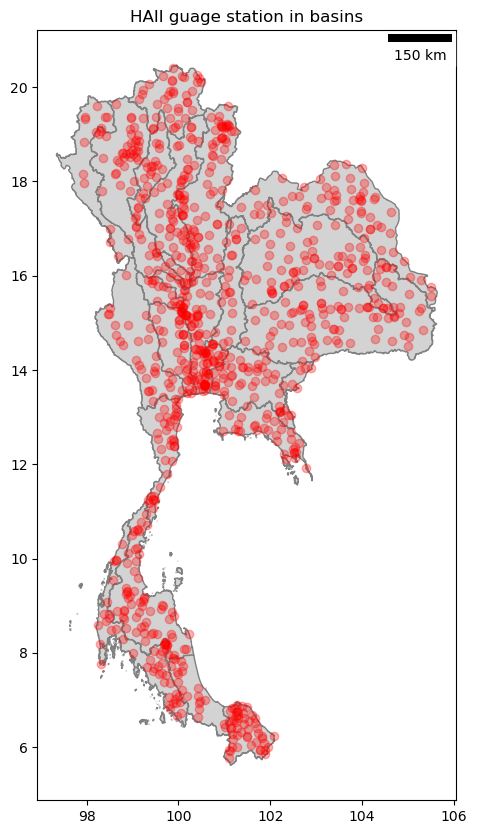

In [10]:
from shapely.geometry.point import Point

points = gpd.GeoSeries(
    [Point(100, 16), Point(101, 16)], crs=4326
)  # Geographic WGS 84 - degrees
points = points.to_crs(32647)  # Projected WGS 84 - meters

distance_meters = points[0].distance(points[1])

fig, ax = plt.subplots(figsize = (10,10))
basin_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey', edgecolor='grey', linewidth=1)
geo_df_st.plot(ax=ax,  color='red', alpha = .3 )
ax.add_artist(ScaleBar(distance_meters))
ax.set_title('HAII guage station in basins')
plt.savefig('../2results/map_gauge_haii_basins.jpg')

## นับจำนวนสถานีวัดน้ำฝนในแต่ละลุ่มน้ำ

In [11]:
# ใช้ Spatial Joins
pointsInPolygon = gpd.sjoin(geo_df_st, basin_map.to_crs(epsg=4326), how="inner", op='intersects')

# เพิ่ม field เติมค่า 1 ทุกแถว เป็นค่าตั้งต้น
pointsInPolygon['sta_count']=1

# นับจำนวนสถานีในแต่ละลุ่มน้ำด้วยการใช้ groupby
sum_st_in_basin=pointsInPolygon.groupby(['MBASIN_E']).sum()
sum_st_in_basin

C:\Users\Admin\anaconda3\envs\ml_dl_n1\lib\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\Admin\AppData\Local\Temp\ipykernel_29912\2610102636.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  pointsInPolygon = gpd.sjoin(geo_df_st, basin_map.to_crs(epsg=4326), how="inner", op='intersects')
C:\Users\Admin\AppData\Local\Temp\ipykernel_29912\2610102636.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_s

,lat,long,index_right,AREA_SQKM,sta_count
MBASIN_E,,,,,
Bang Pakong,578.469844,4260.426413,630,8.525307e+05,42
Chao Phraya,1342.133656,9241.486995,828,1.880509e+06,92
Chi,1071.060424,6795.122694,198,3.251793e+06,66
East Coast Gulf,365.813937,2957.630701,493,3.806637e+05,29
East Coast Gulf (Island),12.103446,102.352026,18,4.016235e+02,1
Mae Klong,429.455585,2976.885763,420,9.067070e+05,30
Mun,1270.394933,8691.728064,336,5.959608e+06,84
Nan,1435.419988,8147.709821,648,2.821933e+06,81
North Khong,711.690530,3595.723974,36,6.275730e+05,36


## Join dataframe จำนวนสถานีกับ shape ลุ่มน้ำ แสดงแผนที่ chrolopeth map
https://geopandas.org/en/stable/docs/user_guide/mapping.html

In [12]:
coun_st_basin = basin_map.merge(sum_st_in_basin, on='MBASIN_E', how='left')

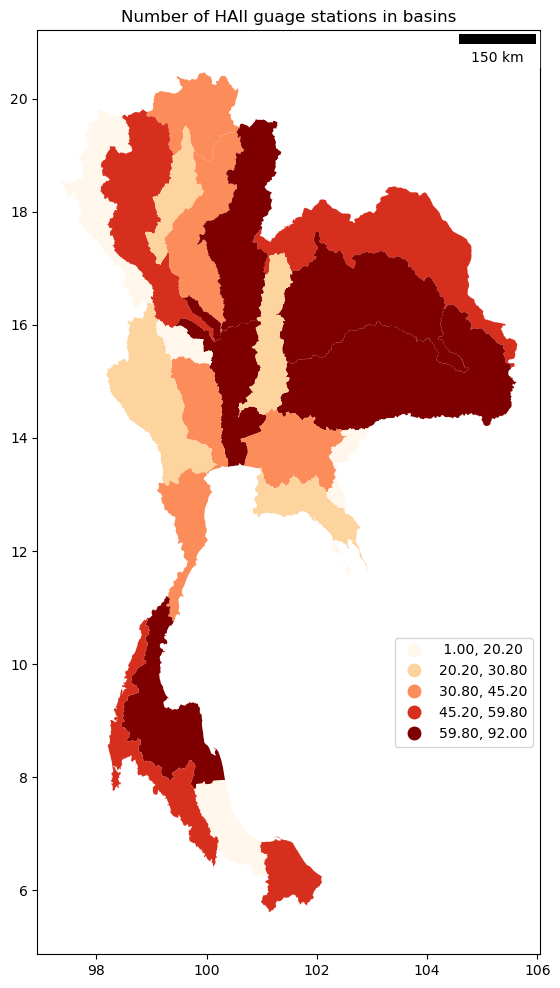

In [13]:
# plot chrolopeth map
# set scale bar
points = gpd.GeoSeries(
    [Point(100, 16), Point(101, 16)], crs=4326
)  # Geographic WGS 84 - degrees
points = points.to_crs(32647)  # Projected WGS 84 - meters

distance_meters = points[0].distance(points[1])

# plot แผนที่
fig, ax = plt.subplots(figsize = (10,12))
coun_st_basin.to_crs(epsg=4326).plot(ax=ax,column='sta_count', cmap='OrRd',scheme='quantiles',  legend=True) # scheme='quantiles',
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.5, 0.0, 0.5, 0.35))
ax.add_artist(ScaleBar(distance_meters))

ax.set_title('Number of HAII guage stations in basins')
plt.savefig('../2results/map_num_gauge_haii_basins.jpg')


# ใส่ชื่อลุ่มน้ำ labeling
โค้ดจาก https://github.com/shotleft/how-to-python/blob/master/How%20it%20works%20-%20labelling%20districts%20in%20GeoPandas.ipynb

In [14]:
import adjustText as aT

In [15]:
coun_st_basin = coun_st_basin.to_crs(epsg=4326)
coun_st_basin["rep"] = coun_st_basin["geometry"].representative_point()
basin_points = coun_st_basin.copy()
basin_points.set_geometry("rep", inplace = True)

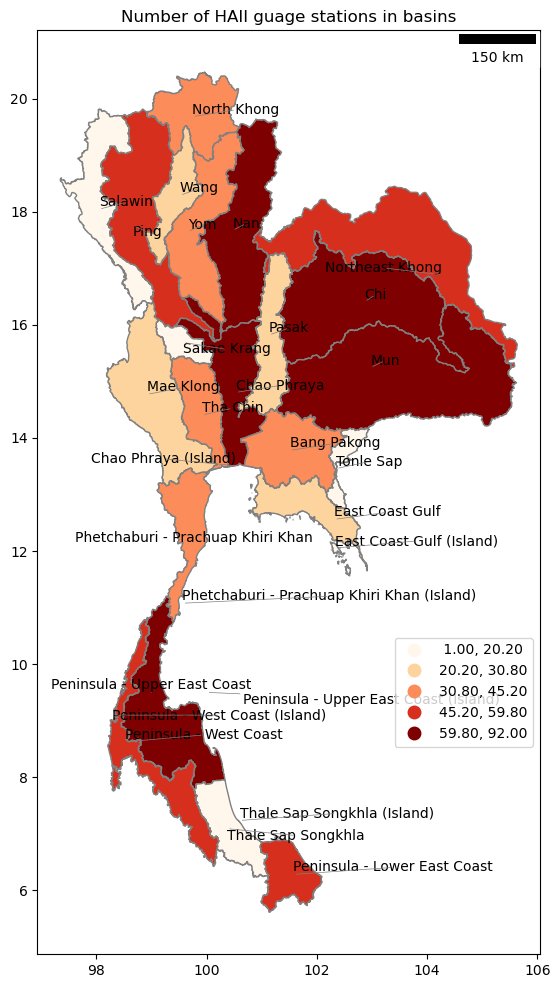

In [16]:
# plot แผนที่
fig, ax = plt.subplots(figsize = (15,12))
coun_st_basin.to_crs(epsg=4326).plot(ax=ax,column='sta_count', cmap='OrRd', 
                                     edgecolor='grey', linewidth=1,
                                     scheme='quantiles',  legend=True) # scheme='quantiles',
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.5, 0.0, 0.5, 0.35))
ax.add_artist(ScaleBar(distance_meters))

# labeling
texts = []
for x, y, label in zip(basin_points.geometry.x, basin_points.geometry.y, basin_points["MBASIN_E"]):
    texts.append(plt.text(x, y, label, fontsize = 10))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

ax.set_title('Number of HAII guage stations in basins')
plt.savefig('../2results/map_num_gauge_haii_basins.jpg')

## ต่อไปจะสร้าง จุดสถานีเรดาร์พิษณุโลก แล้วทำ buffer 240 กิโลเมตร แล้วทำการ spatial join เพื่อหาสถานีที่ตกอยู่ในรัศมีเรดาร์ แล้วนำจำนวนสถานีเหล่านั้นไปดึงข้อมูลฝนรายวัน ของปี 2018 เดือนกันยายนมา แล้วนำมาพลอตแผนที่